In [ ]:
https://www.dropbox.com/scl/fo/izxfbyj5osofg04swn1bx/ABQrXH3gQ0rmvBKET67WnW0?rlkey=phs65g7zvgpzcxha1amqi0m4m&st=kx2508xt&dl=0

SyntaxError: invalid syntax (<ipython-input-7-5a56b57d843b>, line 1)

In [ ]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [ ]:
!wget https://www.dropbox.com/scl/fo/8hbclck97ormewin8lumh/ACt3IL0cQ2RXdLyDur8zBck?rlkey=ktmkopd3mwxg0wq7xf36yjvgx&st=5wdb12ql&dl=0

--2024-07-22 07:18:23--  https://www.dropbox.com/scl/fo/8hbclck97ormewin8lumh/ACt3IL0cQ2RXdLyDur8zBck?rlkey=ktmkopd3mwxg0wq7xf36yjvgx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9f31e84dfe9c27ca4e436b6be9.dl.dropboxusercontent.com/zip_download_get/B6kWAl6eZEog3KqJTmQS4o1DWwTXSokXd0K5mVgWCDDd0A3W-wEUAcSI7VznWHWIcz_CC3Tx0Ye3W2ZDgpJbeLK_a71KIG6WdQLXAlqZVd_QEg# [following]
--2024-07-22 07:18:23--  https://uc9f31e84dfe9c27ca4e436b6be9.dl.dropboxusercontent.com/zip_download_get/B6kWAl6eZEog3KqJTmQS4o1DWwTXSokXd0K5mVgWCDDd0A3W-wEUAcSI7VznWHWIcz_CC3Tx0Ye3W2ZDgpJbeLK_a71KIG6WdQLXAlqZVd_QEg
Resolving uc9f31e84dfe9c27ca4e436b6be9.dl.dropboxusercontent.com (uc9f31e84dfe9c27ca4e436b6be9.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to uc9f31e84dfe9c27ca4e436b6be9.dl.dropbo

In [ ]:
!unzip ACt3IL0cQ2RXdLyDur8zBck?rlkey=ktmkopd3mwxg0wq7xf36yjvgx

Archive:  ACt3IL0cQ2RXdLyDur8zBck?rlkey=ktmkopd3mwxg0wq7xf36yjvgx
mapname:  conversion of  failed
replace images.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: images.zip              

1 archive had fatal errors.


In [ ]:
!mv 'ACt3IL0cQ2RXdLyDur8zBck?rlkey=ktmkopd3mwxg0wq7xf36yjvgx' archive.zip
!unzip archive.zip

Archive:  archive.zip
mapname:  conversion of  failed
replace images.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: images.zip              


In [ ]:
!unzip images.zip


Streaming output truncated to the last 5000 lines.
  inflating: images/58128.jpg        
  inflating: images/58129.jpg        
  inflating: images/5813.jpg         
  inflating: images/58131.jpg        
  inflating: images/58132.jpg        
  inflating: images/58133.jpg        
  inflating: images/58135.jpg        
  inflating: images/58136.jpg        
  inflating: images/58137.jpg        
  inflating: images/58138.jpg        
  inflating: images/58139.jpg        
  inflating: images/5814.jpg         
  inflating: images/58140.jpg        
  inflating: images/58141.jpg        
  inflating: images/58143.jpg        
  inflating: images/58144.jpg        
  inflating: images/58145.jpg        
  inflating: images/58146.jpg        
  inflating: images/58147.jpg        
  inflating: images/58148.jpg        
  inflating: images/58149.jpg        
  inflating: images/5815.jpg         
  inflating: images/58150.jpg        
  inflating: images/58151.jpg        
  inflating: images/58152.jpg        

In [ ]:
!ls


archive.zip  images  images.zip  sample_data


In [ ]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))


In [ ]:
len(filenames)

44441

In [ ]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 [==============================] - 2s 2s/step


array([0.        , 0.00295302, 0.        , ..., 0.00752505, 0.02113522,
       0.0040174 ], dtype=float32)

In [ ]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [ ]:
extract_features_from_images(filenames[0], model)

1/1 [==============================] - 0s 210ms/step


array([0.00895979, 0.04125569, 0.        , ..., 0.01971774, 0.02310665,
       0.08883788], dtype=float32)

In [ ]:
import numpy as np

# Initialize a counter for the number of images left to be uploaded
images_left = 44441

# Divide the 44441 images into 3 separate sections
section_size = 44441 // 3
section1 = filenames[0:section_size]
section2 = filenames[section_size:2*section_size]
section3 = filenames[2*section_size:]

# Extract features for each section
section1_features = [extract_features_from_images(file, model) for file in section1]
images_left -= len(section1)
print(f"Uploaded {len(section1)} images. {images_left} images left to be uploaded.")

section2_features = [extract_features_from_images(file, model) for file in section2]
images_left -= len(section2)
print(f"Uploaded {len(section2)} images. {images_left} images left to be uploaded.")

section3_features = [extract_features_from_images(file, model) for file in section3]
images_left -= len(section3)
print(f"Uploaded {len(section3)} images. {images_left} images left to be uploaded.")

# Combine the features from all sections
image_features = section1_features + section2_features + section3_features

# Write the combined features to a file
with open('image_features.pkl', 'wb') as f:
    pkl.dump(image_features, f)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 198ms/step
Uploaded 14815 images. 0 images left to be uploaded.


In [ ]:
image_features = []
#for file in filenames[0:44441]:
    image_features.append(extract_features_from_images(file, model))
image_features

In [ ]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [ ]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [ ]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [ ]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [ ]:
np.array(Image_features).shape

(44441, 2048)

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [ ]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [ ]:
input_image = extract_features_from_images('10009.jpg',model)

1/1 [==============================] - 0s 201ms/step


In [ ]:
distance,indices = neighbors.kneighbors([input_image])

In [ ]:
indices[0]

array([33117,  2659, 35002, 12459,  2746, 13677])

In [ ]:
from IPython.display import Image

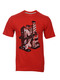

In [ ]:
Image('10009.jpg')

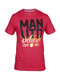

In [ ]:
Image(filenames[indices[0][1]])

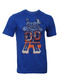

In [ ]:
Image(filenames[indices[0][2]])

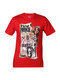

In [ ]:
Image(filenames[indices[0][3]])

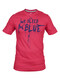

In [ ]:
Image(filenames[indices[0][4]])

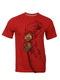

In [ ]:
Image(filenames[indices[0][5]])